<a href="https://colab.research.google.com/github/Poojitha20-B/Deep-Reinforcement-Learning-Internship/blob/main/Day7_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep CNN for MNIST (10+ Hidden Layers)

This notebook implements a deep CNN (more than 10 layers) to demonstrate how increasing depth affects performance and overfitting. The model is trained on the MNIST dataset and evaluated for max accuracy without augmentation or EfficientNet.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Deep CNN Architecture (More than 10 layers)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

# Block 2
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.3))

# Block 3
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.4))

# Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile and Train

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_cat, epochs=20, batch_size=128, validation_split=0.1, callbacks=[EarlyStopping(patience=3, restore_best_weights=True)])

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 349s 808ms/step - accuracy: 0.7591 - loss: 0.7958 - val_accuracy: 0.1587 - val_loss: 5.9635
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 387s 821ms/step - accuracy: 0.9721 - loss: 0.0945 - val_accuracy: 0.9870 - val_loss: 0.0441
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 337s 800ms/step - accuracy: 0.9787 - loss: 0.0726 - val_accuracy: 0.9930 - val_loss: 0.0263
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 327s 775ms/step - accuracy: 0.9842 - loss: 0.0529 - val_accuracy: 0.9887 - val_loss: 0.0363
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 383s 776ms/step - accuracy: 0.9853 - loss: 0.0481 - val_accuracy: 0.9930 - val_loss: 0.0233
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 382s 776ms/step - accuracy: 0.9880 - loss: 0.0405 - val_accuracy: 0.9927 - val_loss: 0.0264
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 328s 775ms/step - accuracy: 0.9894 - loss: 0.0358 - val_accuracy: 0.9895 - val_loss: 0.0313
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 329s 781ms/step - accuracy: 0.9888 -

## Evaluate the Model

In [ ]:
loss, acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test Accuracy with Deep CNN: {acc:.4f}")

Test Accuracy with Deep CNN: 0.9953


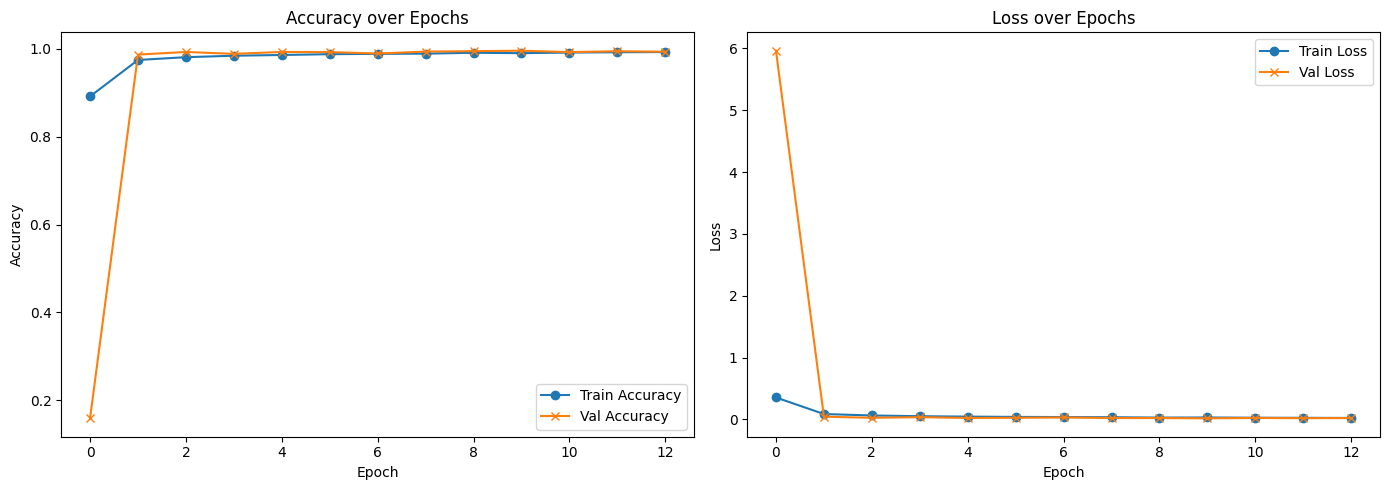

In [ ]:
# Plot Accuracy & Loss
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='x')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='x')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Observation

Deep cnn got 99.53% accuracy on mnist – super high even without augmentation or fancy stuff like efficientnet. val accuracy shot up past 98% in just 1 epoch and stayed stable throughout. in the graphs, both acc and loss curves are clean – no big gaps between train & val, so no overfitting. learning was smooth and consistent.

Accuracy is rising like crazy after epoch 1 (from 75% to above 99% real quick) — model learning fast!
val accuracy stays high & stable after ~epoch 3 → means it is generalizing well, not just memorizing.
loss dropping steadily — from 0.79 to 0.02 — both train & val loss go down together
no signs of overfitting even after 13 epochs... despite depth... thanks to batchnorm + dropout
peak test acc: 99.53% — which is insane for no augmentation & just MNIST
